In [87]:
## Importing important libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [88]:
## read cvs file
df= pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [89]:
## get the number of rows and columns 
num_rows, num_cols = df.shape
print(f"There are {num_rows} rows and {num_cols} columns")

There are 27820 rows and 12 columns


In [90]:
## get the datas info (dtype, columns, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [91]:
## get descriptive statistics
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [92]:
## checking for null values
df.isnull().sum()
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 

There are 19456 missing values in the data.


In [93]:
## replacing the null value in the [HDI for year] column with the mean
df.replace(to_replace=np.nan,value=df.mean(), inplace=True) 
print("There are {} missing values in the data.".format(df.isna().sum().sum()))

There are 0 missing values in the data.


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_65511/3822161959.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(to_replace=np.nan,value=df.mean(), inplace=True)


In [94]:
## Rename columns 
df.rename({"suicides_no":"suicides_number", "suicides/100k pop":"suicides_per_100k_pop", "country-year":"country_year", "HDI for year":"HDI_for_year"}, axis = "columns",inplace = True)
df.rename(columns=lambda x: x.replace('($)', ''), inplace= True)
df.head()

,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [95]:
# Remove years from age 
df.loc[:, 'age'] = df['age'].str.replace('years', '') 
df

,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54,107,3620833,2.96,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+,9,348465,2.58,Uzbekistan2014,0.675000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14,60,2762158,2.17,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14,44,2631600,1.67,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z


#### What is the min, max and average suicide ?

In [96]:
## The average suicide number
suicide_num= df['suicides_number'].mean()
print(f"The average suicide number per year is {suicide_num}")

suicide_100k= df['suicides_per_100k_pop'].mean()
print(f"The average suicides per 100k population per year is {suicide_100k}")


The average suicide number per year is 242.57440690150972
The average suicides per 100k population per year is 12.816097411933864


In [97]:
## The min and max suicide number 
min= df['suicides_number'].agg(['min'])
print(f"The minimum suicide number per year is {min}")

max= df['suicides_number'].agg(['max'])
print(f"The maximum suicide number per year is {max}")


The minimum suicide number per year is min    0
Name: suicides_number, dtype: int64
The maximum suicide number per year is max    22338
Name: suicides_number, dtype: int64


array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'suicides_number'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'suicides_per_100k_pop'}>],
       [<AxesSubplot: title={'center': 'HDI_for_year'}>,
        <AxesSubplot: title={'center': 'gdp_per_capita '}>]], dtype=object)

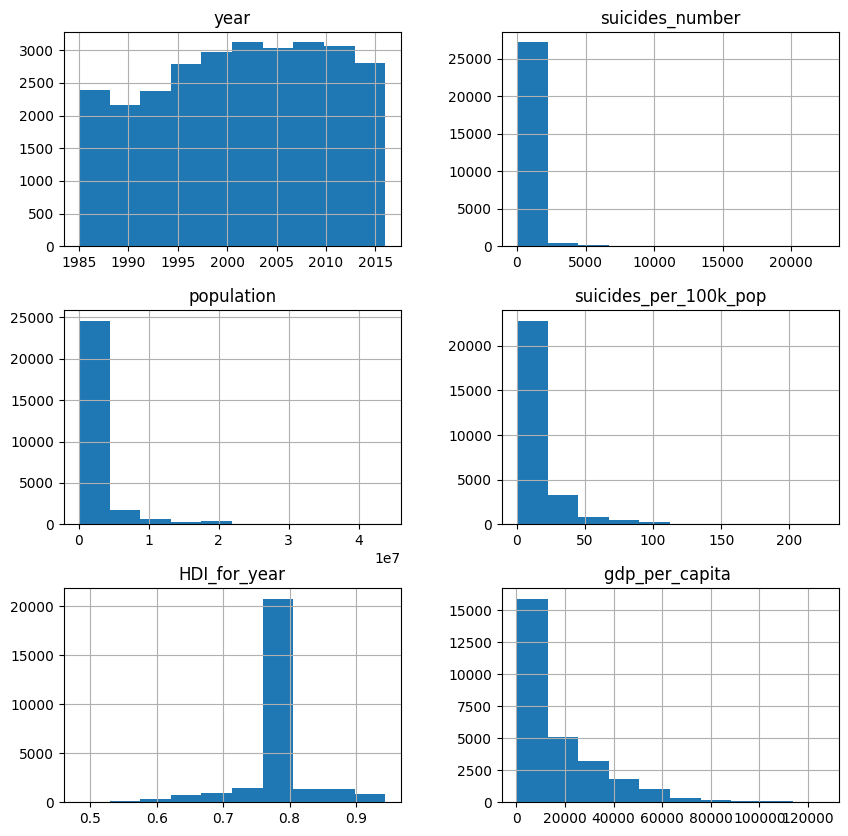

In [98]:
## Distribution of all columns 
df.hist(figsize=(10, 10))

#### What is the suicide rate in the United States over the years ?

In [99]:
## Suicide numbers in the USA
US_suicide= df['country']=='United States'
df[US_suicide].head()

,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
26848,United States,1985,male,75+,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [100]:
## Highest suicide numbers in the USA and the generation
highest_US_suicide= df[US_suicide].sort_values('suicides_number', ascending= False).head(20)
highest_US_suicide.head()

,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27149,United States,2010,male,35-54,11767,42798501,27.49,United States2010,0.909000,"14,964,372,000,000",51989,Generation X
27173,United States,2012,male,35-54,11763,42326226,27.79,United States2012,0.912000,"16,155,255,000,000",55170,Generation X
27161,United States,2011,male,35-54,11681,42566273,27.44,United States2011,0.911000,"15,517,926,000,000",53452,Generation X
27210,United States,2015,male,35-54,11634,41658010,27.93,United States2015,0.776601,"18,120,714,000,000",60387,Generation X
27137,United States,2009,male,35-54,11613,42932194,27.05,United States2009,0.776601,"14,418,739,000,000",50563,Boomers


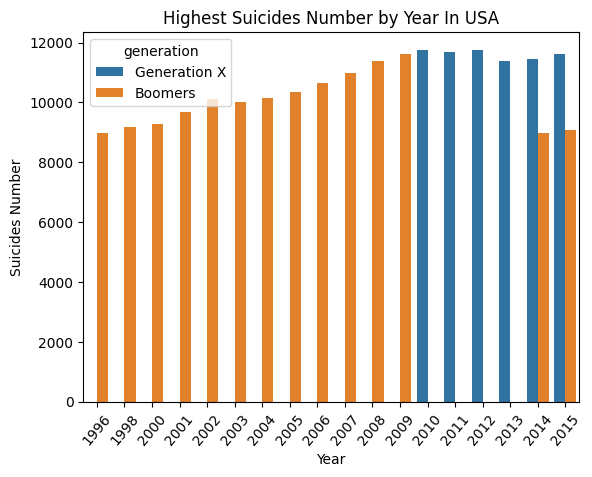

In [101]:
sns.barplot(data=highest_US_suicide, x='year', y='suicides_number', hue='generation')
# Adding title and labels
plt.title('Highest Suicides Number by Year In USA')
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.xticks(rotation=50)
plt.savefig('image/High_sui_number_USA.jpg')
plt.show()

In [102]:
## lowest suicide numbers in the USA and which generation
lowest_US_suicide= df[US_suicide].sort_values('suicides_number', ascending= True).head(30)
lowest_US_suicide.head()

,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
27027,United States,1999,female,5-14,50,19275566,0.26,United States1999,0.776601,"9,660,624,000,000",38072,Millenials
26883,United States,1987,female,5-14,52,16660000,0.31,United States1987,0.776601,"4,870,217,000,000",21631,Generation X
27123,United States,2007,female,5-14,53,19714203,0.27,United States2007,0.776601,"14,477,635,000,000",51585,Generation Z
26871,United States,1986,female,5-14,56,16517000,0.34,United States1986,0.776601,"4,590,155,000,000",20588,Generation X
27075,United States,2003,female,5-14,56,19991981,0.28,United States2003,0.776601,"11,510,670,000,000",42468,Millenials


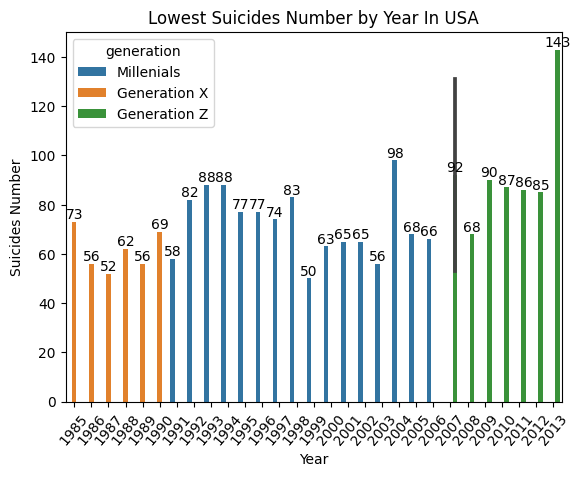

In [103]:
ax= sns.barplot(data=lowest_US_suicide, x='year', y='suicides_number', hue='generation')
for i in ax.containers:
    ax.bar_label(i)
# Adding title and labels
plt.title('Lowest Suicides Number by Year In USA')
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.xticks(rotation=50)
# Showing the plot
plt.savefig('image/low_sui_number_USA.jpg')
plt.show()



In [104]:
## How many people in the USA commit suicide per day
total_suicides_in_US = df[df.country == 'United States'].suicides_number.sum()
total_suicides_in_US

total_years = df[df.country == 'United States'].year
total_years = total_years.max() - total_years.min()
total_years

total_days = total_years * 365
total_days

suicides_per_day_in_US = (1 / total_days) * total_suicides_in_US
suicides_per_day_in_US

print(f"{suicides_per_day_in_US} people in the USA commit suicide per day")


94.43041095890412 people in the USA commit suicide per day


#### Which countries have the highest/lowest number of suicide 

In [105]:
## countries with the highest suicide number 
highest_suicide= df.sort_values(by='suicides_number', ascending= False).head(30)
highest_suicide.head()


,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
20996,Russian Federation,1994,male,35-54,22338,19044200,117.30,Russian Federation1994,0.776601,"395,077,301,248",2853,Boomers
21008,Russian Federation,1995,male,35-54,21706,19249600,112.76,Russian Federation1995,0.776601,"395,531,066,563",2844,Boomers
21080,Russian Federation,2001,male,35-54,21262,21476420,99.00,Russian Federation2001,0.776601,"306,602,673,980",2229,Boomers
21068,Russian Federation,2000,male,35-54,21063,21378098,98.53,Russian Federation2000,0.776601,"259,708,496,267",1879,Boomers
21057,Russian Federation,1999,male,35-54,20705,21016400,98.52,Russian Federation1999,0.776601,"195,905,767,669",1412,Boomers


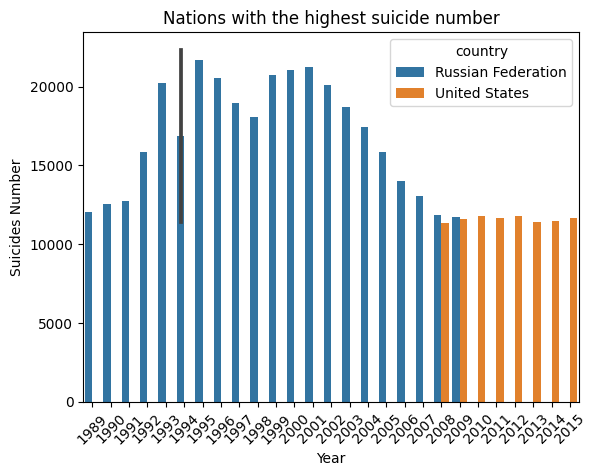

In [106]:
# bar plot of nations with the highest suicide number 
sns.barplot(data=highest_suicide, x='year', y='suicides_number', hue='country')
# Adding title and labels
plt.title('Nations with the highest suicide number')
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.xticks(rotation=45)

# Showing the plot
plt.savefig('image/nat_high_sui_num.jpg')
plt.show()




In [107]:
## Countries with the lowest suicide rate 
lowest_suicide= df.sort_values(by='suicides_number', ascending= True).head(10)
lowest_suicide.style.set_properties(subset=['country','suicides_number'], **{'background-color': 'orange'})

,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
10715,Guatemala,1986,female,75+,0,42581,0.000000,Guatemala1986,0.776601,"7,231,963,516",1044,G.I. Generation
11684,Iceland,1985,female,75+,0,6100,0.000000,Iceland1985,0.776000,"2,939,845,038",13357,G.I. Generation
24330,Suriname,2011,female,75+,0,7088,0.000000,Suriname2011,0.709000,"4,422,276,622",9184,Silent
24331,Suriname,2011,male,5-14,0,51989,0.000000,Suriname2011,0.709000,"4,422,276,622",9184,Generation Z
14335,Kuwait,2002,male,75+,0,4762,0.000000,Kuwait2002,0.776601,"38,137,545,245",17668,Silent
14334,Kuwait,2002,male,55-74,0,67364,0.000000,Kuwait2002,0.776601,"38,137,545,245",17668,Silent
18755,Paraguay,2003,female,75+,0,56494,0.000000,Paraguay2003,0.776601,"6,588,103,836",1339,Silent
11685,Iceland,1985,male,5-14,0,21400,0.000000,Iceland1985,0.776000,"2,939,845,038",13357,Generation X
11683,Iceland,1985,female,5-14,0,20400,0.000000,Iceland1985,0.776000,"2,939,845,038",13357,Generation X
11681,Iceland,1985,female,15-24,0,21200,0.000000,Iceland1985,0.776000,"2,939,845,038",13357,Generation X


### Countries suicide rate per 100k population

In [108]:
## highest suicide rate per 100k pop
high_sui_100k= df.sort_values(by='suicides_per_100k_pop', ascending= False).head(10)
high_sui_100k.style.set_properties(subset=['country','suicides_per_100k_pop'], **{'background-color': 'orange'})


,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
1258,Aruba,1995,male,75+,2,889,224.970000,Aruba1995,0.776601,"1,320,670,391",17949,G.I. Generation
22280,Seychelles,2006,male,75+,2,976,204.920000,Seychelles2006,0.776601,"1,016,418,229",12442,Silent
24332,Suriname,2012,male,75+,10,5346,187.060000,Suriname2012,0.711000,"4,980,000,000",10227,Silent
20542,Republic of Korea,2011,male,75+,1276,688365,185.370000,Republic of Korea2011,0.776601,"1,202,463,682,634",25157,Silent
20530,Republic of Korea,2010,male,75+,1152,631853,182.320000,Republic of Korea2010,0.776601,"1,094,499,338,703",22994,Silent
11376,Hungary,1992,male,75+,317,178482,177.610000,Hungary1992,0.776601,"38,724,945,368",3970,G.I. Generation
11388,Hungary,1993,male,75+,300,168944,177.570000,Hungary1993,0.776601,"40,119,073,326",4116,G.I. Generation
11364,Hungary,1991,male,75+,333,188235,176.910000,Hungary1991,0.776601,"34,748,508,332",3561,G.I. Generation
20470,Republic of Korea,2005,male,75+,780,442349,176.330000,Republic of Korea2005,0.776601,"898,137,194,716",19460,Silent
11400,Hungary,1994,male,75+,292,165660,176.260000,Hungary1994,0.776601,"43,160,392,124",4431,G.I. Generation


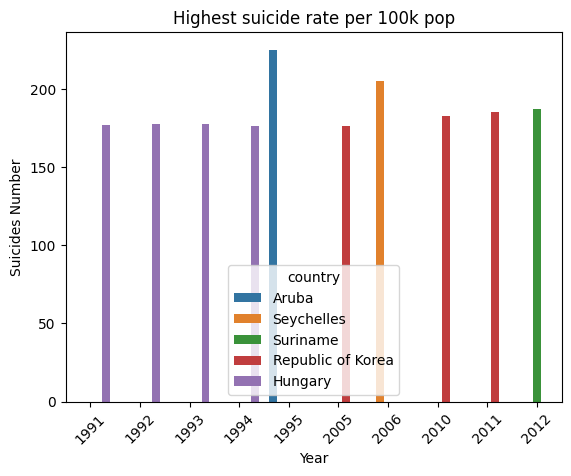

In [109]:
sns.barplot(data=high_sui_100k, x='year', y='suicides_per_100k_pop', hue='country')
# Adding title and labels
plt.title('Highest suicide rate per 100k pop')
plt.xlabel('Year')
plt.ylabel('Suicides Number')
plt.xticks(rotation=45)

# Showing the plot
plt.savefig('image/High_sui_number_100k_pop.jpg')
plt.show()


#### Relationship between HDI at the year of person's suicide and the suicide rate per 100k population

<Figure size 1200x800 with 0 Axes>

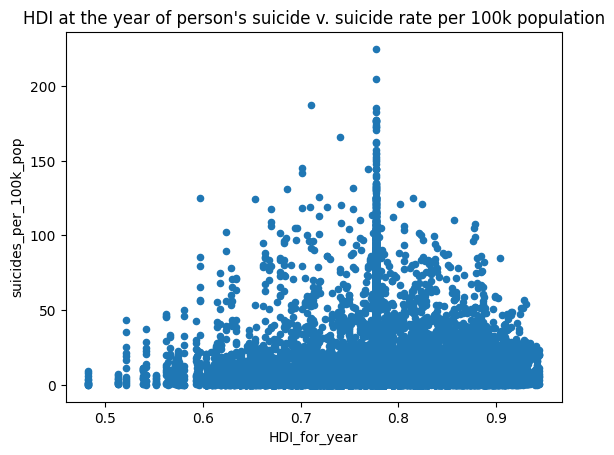

In [110]:
## create a scatter plot
plt.figure(figsize=(12,8))
df.plot (x='HDI_for_year', y='suicides_per_100k_pop', kind='scatter', title="HDI at the year of person's suicide v. suicide rate per 100k population")
plt.savefig('image/Hdi_sui_rate_100K.jpg')



#### Suicide rate by gender, age group and generation

In [111]:
## which gender have the highest average suicide number?
avg_gen_suicides= df.groupby('sex')['suicides_number'].mean()
avg_gen_suicides

sex
female    112.114306
male      373.034508
Name: suicides_number, dtype: float64

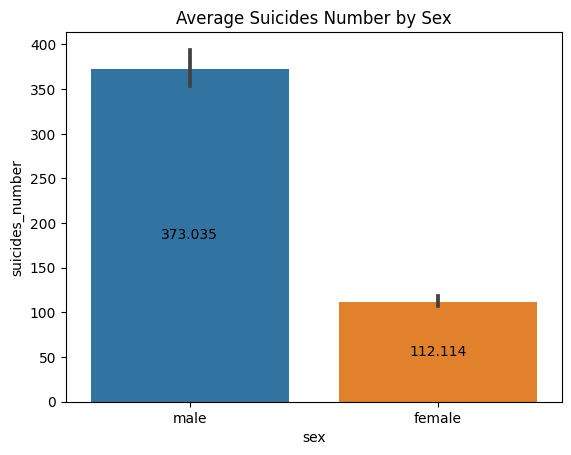

In [112]:
## suicide number by gender
ax= sns.barplot(df, x="sex", y="suicides_number")
ax.set_title('Average Suicides Number by Sex')
ax.bar_label(ax.containers[0], fontsize=10, label_type='center')
plt.savefig('image/sui_number_sex.jpg')


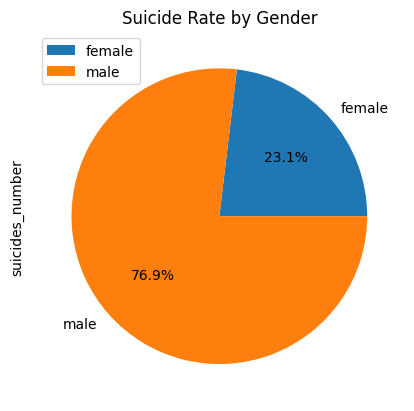

In [113]:
suicide_gender = pd.DataFrame(list(avg_gen_suicides.items()), columns=['sex', 'suicides_number'])

suicide_gender.set_index('sex', inplace=True)

suicide_gender.plot(kind='pie', y='suicides_number', autopct='%1.1f%%')

plt.title('Suicide Rate by Gender')
plt.savefig('image/sui_rate_gen.jpg')
plt.show()


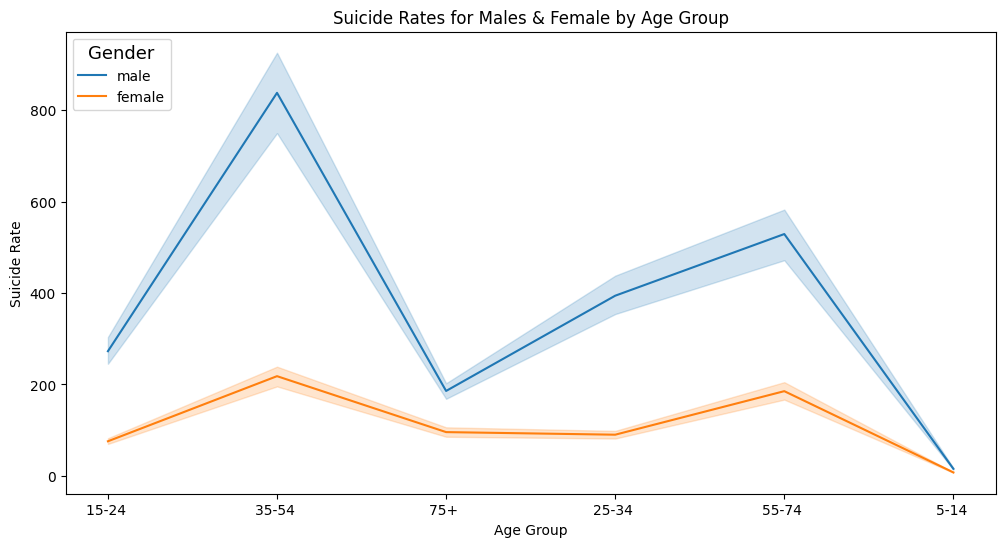

In [114]:
## Suicide Rates for Males & Female by Age Group
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='age', y='suicides_number', hue='sex')
plt.title('Suicide Rates for Males & Female by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicide Rate')
plt.legend(title='Gender', title_fontsize='13', loc='upper left')
plt.savefig('image/sui_rate_age.jpg')
plt.show()


#### Since the age group of 35-54 have the highest suicide rate what is the total number of people who comminted suicide in that age group?

In [115]:
## total number of suicide in the age group of 35-53 
df.groupby('age').suicides_number.sum()[2:3]


age
35-54     2452141
Name: suicides_number, dtype: int64

In [116]:
## average suicide number by generation
avg_gen_suicides= df.groupby('generation')['suicides_number'].mean()
avg_gen_suicides

generation
Boomers            457.815230
G.I. Generation    185.863338
Generation X       239.201623
Generation Z        10.820408
Millenials         106.683607
Silent             279.972344
Name: suicides_number, dtype: float64

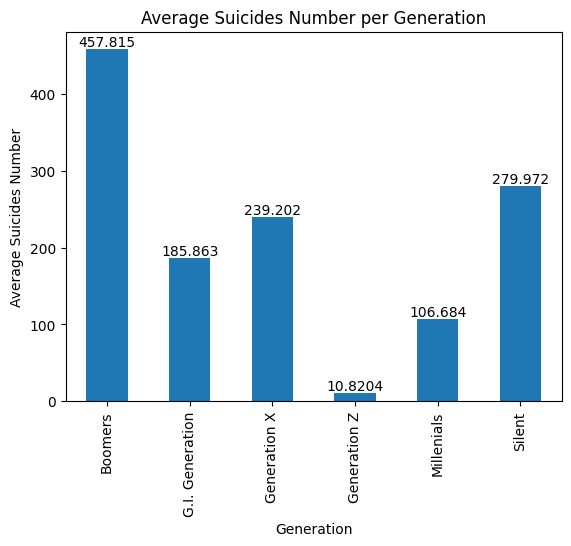

In [117]:
ax= avg_gen_suicides.plot(kind='bar')
ax.bar_label(ax.containers[0], fontsize=10)
# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Average Suicides Number')
plt.title('Average Suicides Number per Generation')

# Show the plot
plt.savefig('image/avg_sui_num_gene.jpg')
plt.show()

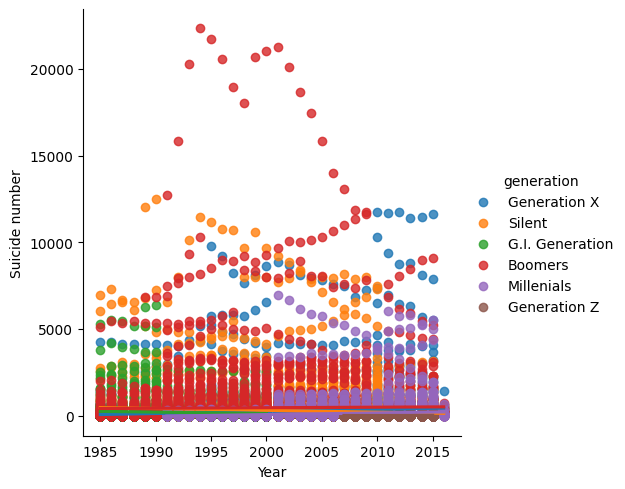

In [118]:
# Suicide number over the years by generations
gsui_year = sns.lmplot(x="year", y="suicides_number", hue="generation",
               truncate=True, height=5, data=df)

gsui_year.set_axis_labels("Year", "Suicide number")
plt.savefig('image/sui_number_gener.jpg')
plt.show()


In [119]:
## Suicide number by sex and generation 
Sg_mean = df.groupby(['sex', 'generation'])['suicides_number'].mean()
Sg_mean

sex     generation     
female  Boomers            184.756713
        G.I. Generation    128.755831
        Generation X        96.703808
        Generation Z         8.355102
        Millenials          45.728953
        Silent             148.425204
male    Boomers            730.873747
        G.I. Generation    242.970845
        Generation X       381.699438
        Generation Z        13.285714
        Millenials         167.638261
        Silent             411.519485
Name: suicides_number, dtype: float64

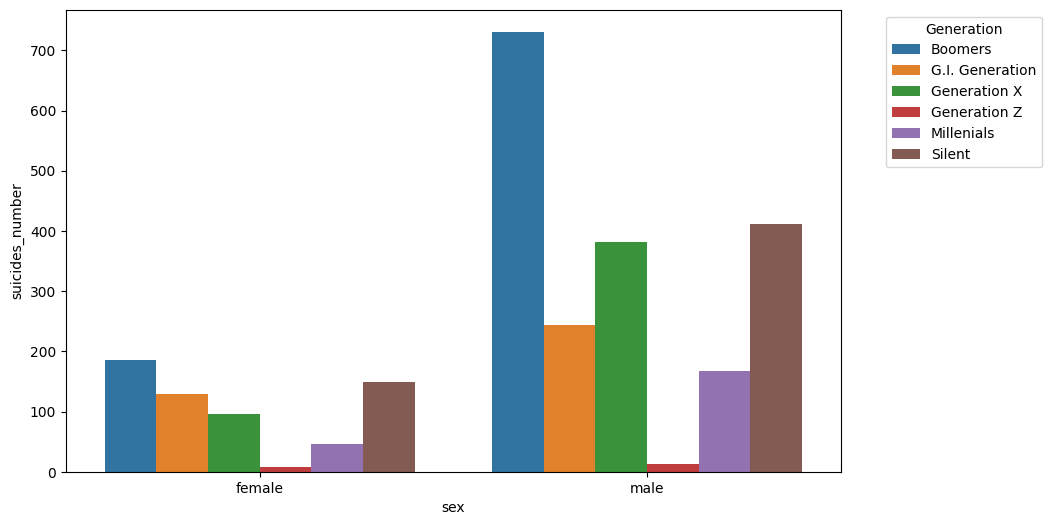

In [120]:
Sg_mean = df.groupby(['sex', 'generation'])['suicides_number'].mean().reset_index()

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='suicides_number', hue='generation', data=Sg_mean)
plt.legend(title='Generation', bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig('image/sui_num_sex_gen.jpg')
plt.show()


#### Which nations average the highest number of suicide ? & Does HDI affect suicide rate ?

In [121]:
df_country = df.groupby(['country']).mean().sort_values(by='suicides_number', ascending= False)
df_country.head()

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_65511/3273710558.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country = df.groupby(['country']).mean().sort_values(by='suicides_number', ascending= False)


,year,suicides_number,population,suicides_per_100k_pop,HDI_for_year,gdp_per_capita
country,,,,,,
Russian Federation,2002.000000,3733.771605,1.139137e+07,34.892377,0.776601,6518.814815
United States,2000.000000,2779.604839,2.165061e+07,13.819812,0.813698,39269.612903
Japan,2000.000000,2169.091398,9.895228e+06,21.573199,0.803923,36397.548387
Ukraine,2000.571429,952.232143,3.828777e+06,26.582321,0.758572,1867.535714
Germany,2002.500000,933.532051,6.489986e+06,15.559904,0.813008,35164.230769


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_65511/261058645.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country = df.groupby(['country']).mean().sort_values(by='suicides_number', ascending= False).head(20)


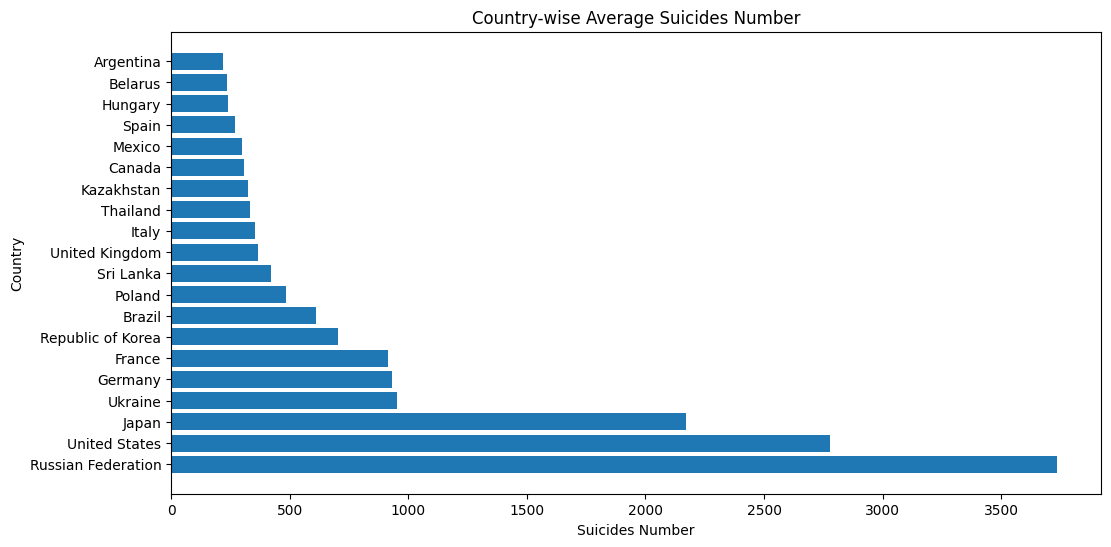

In [122]:
df_country = df.groupby(['country']).mean().sort_values(by='suicides_number', ascending= False).head(20)

plt.figure(figsize=(12,6))
plt.barh(df_country.index, df_country['suicides_number'])
plt.xlabel('Suicides Number')
plt.ylabel('Country')
plt.title('Country-wise Average Suicides Number')
plt.savefig('image/sui_number_country.jpg')
plt.show()


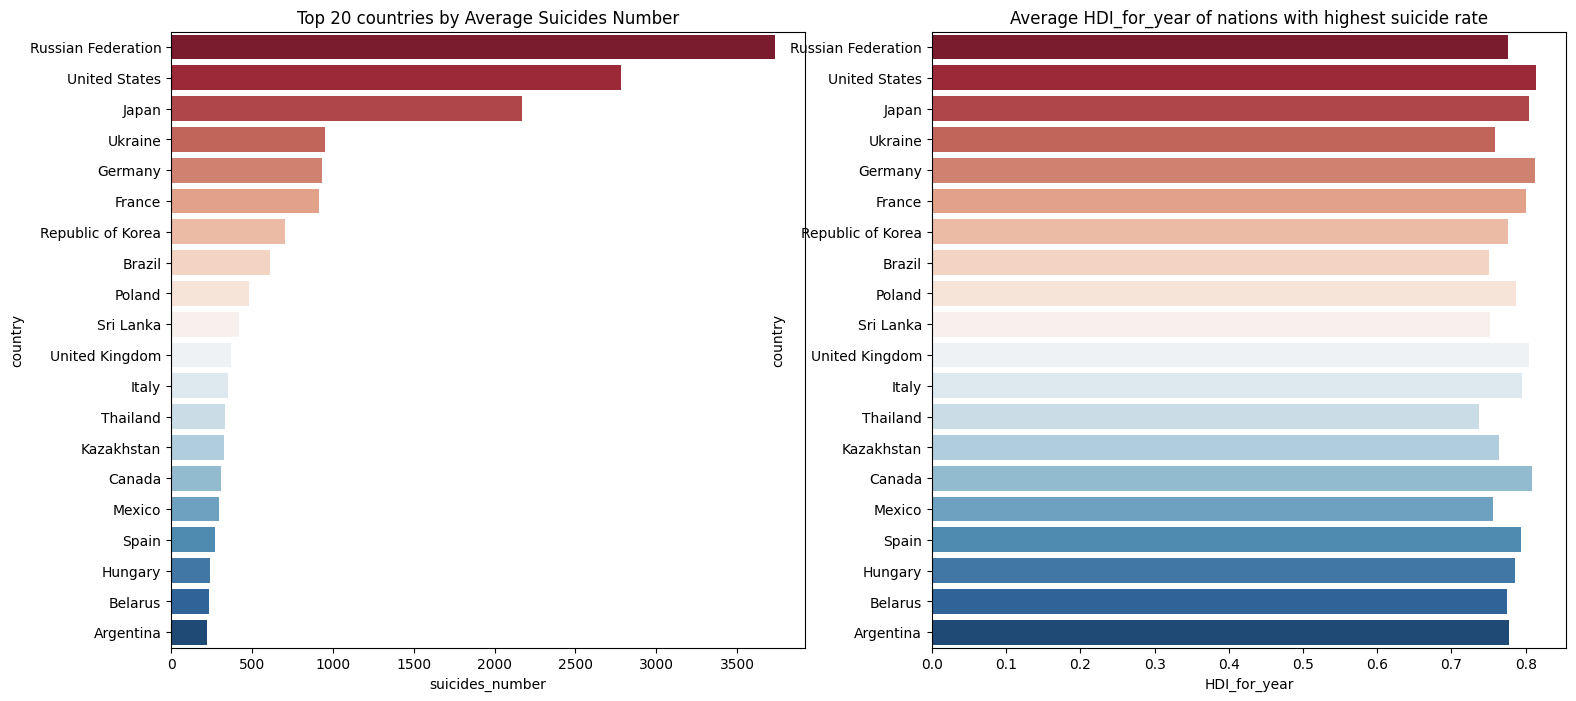

In [123]:
## Does a country HDI impact its crime rate (suicide rate)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,8))
sns.barplot(x=df_country['suicides_number'], y=df_country.index, palette='RdBu', ax=ax1)
sns.barplot(x=df_country['HDI_for_year'], y=df_country.index, palette='RdBu', ax=ax2)
ax1.set_title('Top 20 countries by Average Suicides Number')
ax2.set_title('Average HDI_for_year of nations with highest suicide rate')
plt.savefig('image/HDI_sui_number_USA.jpg')
plt.show()


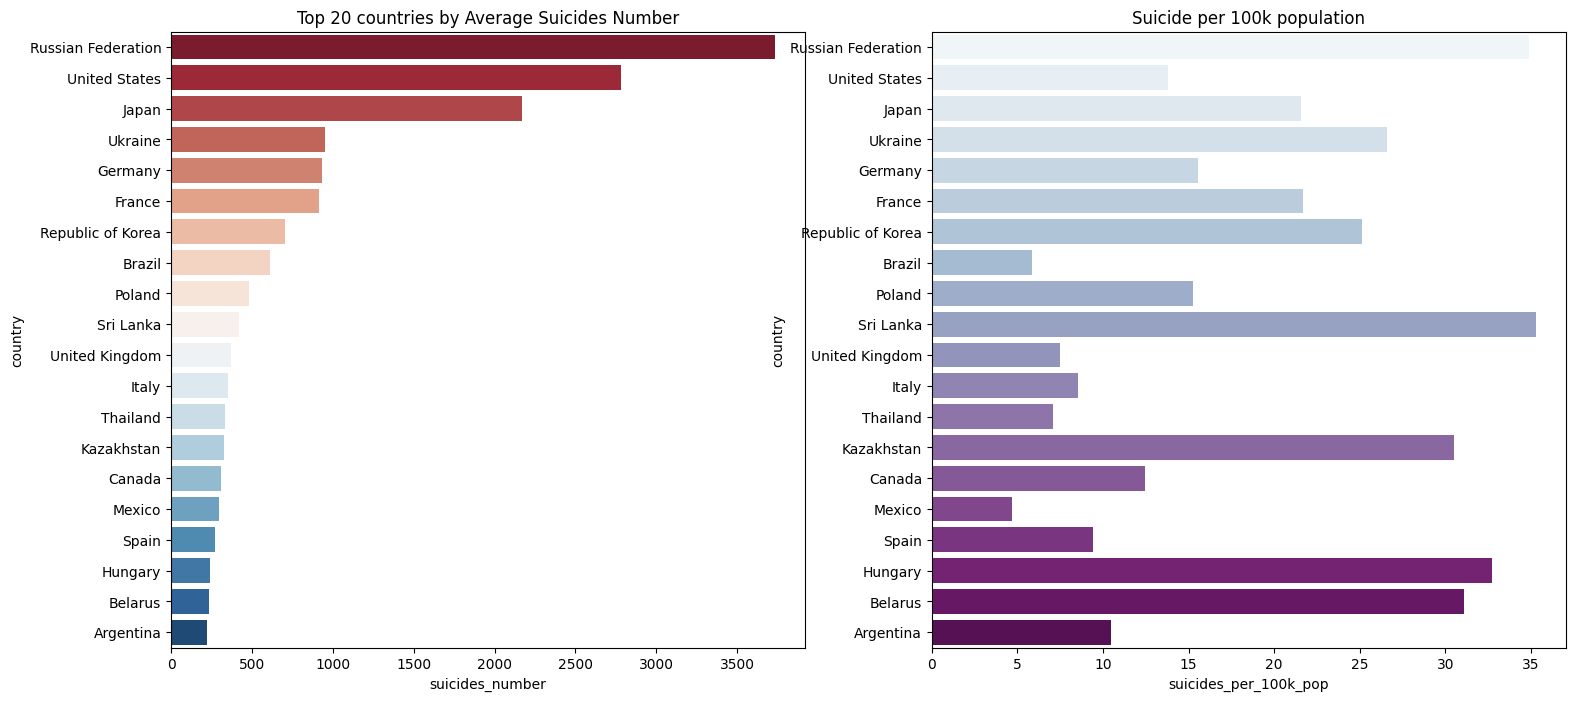

In [124]:
## Does a country HDI impact its crime rate (suicide rate)
fig, (ax1, ax3) = plt.subplots(1,2, figsize=(18,8))
sns.barplot(x=df_country['suicides_number'], y=df_country.index, palette='RdBu', ax=ax1)
sns.barplot(x=df_country['suicides_per_100k_pop'], y=df_country.index, palette='BuPu', ax=ax3)
ax1.set_title('Top 20 countries by Average Suicides Number')
ax3.set_title('Suicide per 100k population')
plt.savefig('image/T20Country_Sui_Number_USA.jpg')
plt.show()


#### Calculate the average suicide rate per year

In [125]:
avg_cou_suicides= df.groupby('year')['suicides_number'].mean()
avg_cou_suicides.head()

year
1985    201.498264
1986    209.496528
1987    195.743827
1988    205.826531
1989    256.801282
Name: suicides_number, dtype: float64

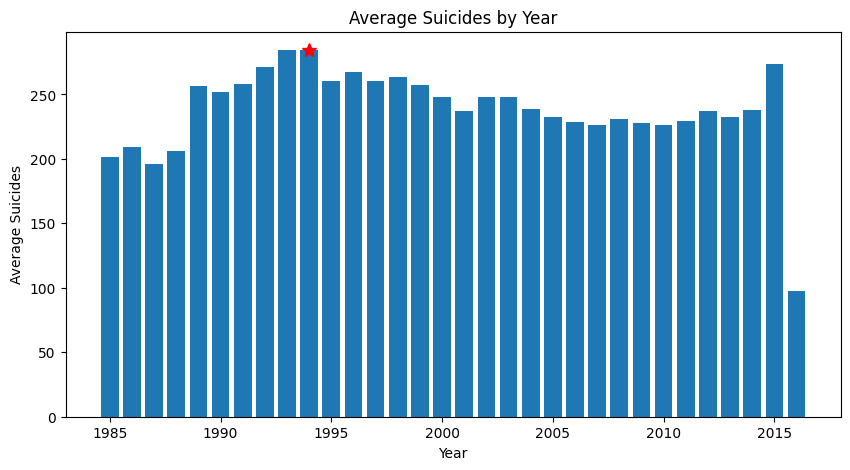

In [126]:
## The average suuicide rate by year
avg_sui_year = df.groupby('year')['suicides_number'].mean()

# Create a bar chart for the average suicides for each year
plt.figure(figsize=(10,5))
plt.bar(avg_sui_year.index, avg_sui_year.values)
plt.xlabel('Year')
plt.ylabel('Average Suicides')
plt.title('Average Suicides by Year')
plt.plot(1994, 284.390931, "*", markersize=10, color="r")
plt.savefig('image/Avg_Sui_Year_USA.jpg')
plt.show()



In [127]:
## Which year had the lowest suicide rate, and which year had the highest suicide rate?
ordered_suicides = df.groupby('year').suicides_number.sum()
ordered_suicides = pd.DataFrame(ordered_suicides)
ordered_suicides.reset_index(inplace = True)

min_and_max_suicide_numbers = list(ordered_suicides.suicides_number.agg(['min', 'max']))
ordered_suicides[ordered_suicides.suicides_number.isin(min_and_max_suicide_numbers)]

,year,suicides_number
14,1999,256119
31,2016,15603
